# Application of ML Classifiers to Identify Aged Cells

During this homework, aged and youthful RBCs will be classified based on DNA methylation profiles.

This homework will:

* Compare performance of various classification algorithms

* Evaluate effects of train/test split on classifier performance



Data for this homework comes from GEO GSE40279: [Hannum, G.; Guinney, J.; Zhao, L.; Zhang, L.; Hughes, G.; Sadda, S.; Klotzle, B.; Bibikova, M.; Fan, J.-B.; Gao, Y.; Deconde, R.; Chen, M.; Rajapakse, I.; Friend, S.; Ideker, T.; Zhang, K. Genome-Wide Methylation Profiles Reveal Quantitative Views of Human Aging Rates. Mol Cell 2013, 49 (2), 359–367.](https://doi.org/10.1016/j.molcel.2012.10.016)

## Problem Statements:

1. Plot the age distribution of subjects using a histogram. Add a vertical line to the plot at age 65.

2. Label subjects using two groups: "youthful" (ages <65) and "aged" (ages >=65). This age threshold divides the subjects into two groups of approximately equal size.

3. Randomly assign 20% of samples in the data to a training set. Assign the remaining 80% of samples to a test set.

4. Train an SVM and logistic regression classifier to predict age labels ("youthful" or "aged") for subjects in the training set based on CpG methylation levels. **Hint:** When training your SVM classifier, use a linear kernel. 

5. Evaluate each classifier's performance on the test set by (a) identifying the classifier's accuracy and (b) generating a confusion matrix.

6. What is the false positive rate of each classifier? What is the false negative rate?

7. Repeat questions 3-6 for a 80%/20% train/test split. How does increasing the training set size affect classifier performance? What considerations would you make when specifying a train/test split?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Load Blood Cell DNA Methylation Data




In [4]:
CpG_methylation = pd.read_csv('data/blood_top_CpGs.csv', index_col=0, header=0).drop(labels="age", axis=1)

print("Shape of Data Set: ")
print()
print(CpG_methylation.shape)
print()
CpG_methylation.head()

Shape of Data Set: 

(656, 3231)



,cg00320765,cg04223956,cg03407966,cg07403374,cg10122230,cg24603972,cg04105597,cg12613081,cg20169734,cg06012428,...,cg04820440,cg12662162,cg18527971,cg24367761,cg13027280,cg14801864,cg04984575,cg24836583,cg18079534,cg17362351
GSM989827,0.785241,0.906154,0.943392,0.945140,0.904783,0.925199,0.939552,0.927781,0.907609,0.562828,...,0.905512,0.113116,0.862678,0.920586,0.918897,0.388287,0.492888,0.015052,0.879088,0.929998
GSM989828,0.811994,0.883670,0.937935,0.938376,0.929686,0.930090,0.945331,0.927932,0.889046,0.494344,...,0.858246,0.086961,0.839228,0.907824,0.893503,0.302853,0.481399,0.022104,0.887265,0.920493
GSM989829,0.771808,0.893670,0.947600,0.915895,0.914621,0.917694,0.953757,0.901260,0.905771,0.538240,...,0.890826,0.124099,0.868137,0.891428,0.899440,0.372548,0.510238,0.012122,0.899792,0.936039
GSM989830,0.800116,0.905407,0.930441,0.922973,0.891672,0.923459,0.951738,0.899530,0.881363,0.533346,...,0.902694,0.087692,0.830208,0.910664,0.921690,0.366668,0.511379,0.021467,0.924791,0.951897
GSM989831,0.799606,0.882730,0.963902,0.909886,0.918864,0.939070,0.964011,0.923141,0.897723,0.604858,...,0.883601,0.098855,0.857063,0.891470,0.904103,0.407622,0.455352,0.021815,0.893462,0.939561


## Load Sample Ages

In [5]:
subject_ages = pd.read_csv("data/subject_ages.csv", index_col=0, header=None)

subject_ages.head()

,1
0,
GSM989827,67.0
GSM989828,89.0
GSM989829,66.0
GSM989830,64.0
GSM989831,62.0


## Solutions

1. Plot the age distribution of subjects using a histogram. Add a vertical line to the plot at age 65.

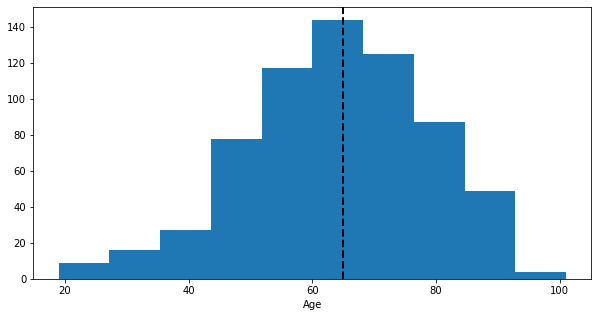

In [9]:
figure,ax = plt.subplots(figsize=(10,5))
ax.hist(subject_ages)
ax.axvline(x=65,color='k', linestyle='dashed',linewidth=2)
ax.set_xlabel('Age')
plt.show()

2. Label subjects using two groups: "youthful" (ages <65) and "aged" (ages >=65). This age threshold divides the subjects into two groups of approximately equal size.

In [34]:
youthful = ["youthful" if age < 65 else "aged" for age in subject_ages.values.flatten()]
# Young are 0, aged are 1

3. Randomly assign 20% of samples in the data to a training set. Assign the remaining 80% of samples to a test set.

In [59]:
x_train, x_test, y_train, y_test = train_test_split(CpG_methylation, youthful, test_size=0.8, train_size=0.2, shuffle=True)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

131
525
131
525


4. Train an SVM and logistic regression classifier to predict age labels ("youthful" or "aged") for subjects in the training set based on CpG methylation levels. **Hint:** When training your SVM classifier, use a linear kernel.

In [60]:
#SVM
clf = svm.SVC(kernel="linear")
clf.fit(x_train, y_train)

#logistic regression
logist_reg = LogisticRegression()
svm_logist_reg = logist_reg.fit(x_train, y_train)

/Users/annikalai/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5. Evaluate each classifier's performance on the test set by (a) identifying the classifier's accuracy and (b) generating a confusion matrix.

In [61]:
#calc accuracy
y_predict_svm = clf.predict(x_test)
y_predict_reg = svm_logist_reg.predict(x_test)
acc_svm = clf.score(x_test,y_test)
acc_reg = svm_logist_reg.score(x_test,y_test)

#calc confusion matrix
CM_svm = confusion_matrix(y_test,y_predict_svm)
CM_reg = confusion_matrix(y_test,y_predict_reg)
print('SVM', 'Accuracy=', acc_svm)
print(CM_svm)
print('Log Reg', 'Accuracy=', acc_reg)
print(CM_reg)

SVM Accuracy= 0.7790476190476191
[[203  66]
 [ 50 206]]
Log Reg Accuracy= 0.7676190476190476
[[195  74]
 [ 48 208]]


6. What is the false positive rate of each classifier? What is the false negative rate?

In [62]:
N_svm = CM_svm[0][1]+CM_svm[1][1]
P_svm = CM_svm[0][0]+CM_svm[1][0]
FP_svm = CM_svm[0][1]/N_svm
FN_svm = CM_svm[1][0]/P_svm

N_reg = CM_reg[0][1]+CM_reg[1][1]
P_reg = CM_reg[0][0]+CM_reg[1][0]
FP_reg = CM_reg[0][1]/N_reg
FN_reg = CM_reg[1][0]/P_reg

print("SVM Classifier")
print('FP rate:', FP_svm, 'FN rate:', FN_svm)
print("Logistic Regression Classifier")
print('FP rate:', FP_reg, 'FN rate:', FN_reg)

SVM Classifier
FP rate: 0.2426470588235294 FN rate: 0.1976284584980237
Logistic Regression Classifier
FP rate: 0.2624113475177305 FN rate: 0.19753086419753085


7. Repeat questions 3-6 for a 80%/20% train/test split. How does increasing the training set size affect classifier performance? What considerations would you make when specifying a train/test split?

In [63]:
x_train, x_test, y_train, y_test = train_test_split(CpG_methylation, youthful, test_size=0.2, train_size=0.8, shuffle=True)
#SVM
clf = svm.SVC(kernel="linear")
clf.fit(x_train, y_train)

#logistic regression
logist_reg = LogisticRegression()
svm_logist_reg = logist_reg.fit(x_train, y_train)

#calc accuracy
y_predict_svm = clf.predict(x_test)
y_predict_reg = svm_logist_reg.predict(x_test)
acc_svm = clf.score(x_test,y_test)
acc_reg = svm_logist_reg.score(x_test,y_test)

#calc confusion matrix
CM_svm = confusion_matrix(y_test,y_predict_svm)
CM_reg = confusion_matrix(y_test,y_predict_reg)
print('SVM', 'Accuracy=', acc_svm)
print(CM_svm)
print('Log Reg', 'Accuracy=', acc_reg)
print(CM_reg)

N_svm = CM_svm[0][1]+CM_svm[1][1]
P_svm = CM_svm[0][0]+CM_svm[1][0]
FP_svm = CM_svm[0][1]/N_svm
FN_svm = CM_svm[1][0]/P_svm

N_reg = CM_reg[0][1]+CM_reg[1][1]
P_reg = CM_reg[0][0]+CM_reg[1][0]
FP_reg = CM_reg[0][1]/N_reg
FN_reg = CM_reg[1][0]/P_reg

print("SVM Classifier")
print('FP rate:', FP_svm, 'FN rate:', FN_svm)
print("Logistic Regression Classifier")
print('FP rate:', FP_reg, 'FN rate:', FN_reg)

/Users/annikalai/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM Accuracy= 0.8333333333333334
[[51 14]
 [ 8 59]]
Log Reg Accuracy= 0.8560606060606061
[[56  9]
 [10 57]]
SVM Classifier
FP rate: 0.1917808219178082 FN rate: 0.13559322033898305
Logistic Regression Classifier
FP rate: 0.13636363636363635 FN rate: 0.15151515151515152


Increasing the training set size improves the performace/accuracy of both classifiers. However, when deciding the relative training/test data split it is important to find a balance between a large enough training data set to train the model well, but also not too large as that could lead to overfitting.